# Import Libraries

In [ ]:
#pip install seaborn

In [103]:
import pandas as pd
import matplotlib as pt
import seaborn as sns 
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
%matplotlib inline
pt.style.use('ggplot')

# Load Dataset

In [64]:
data = pd.read_csv("defaultcreditcardclients.csv") 

# Data Preparation

In [3]:
#Check Null Values
print("No. of columns containing null values")
print(len(data.columns[data.isna().any()]))

No. of columns containing null values
0


Se convierten las variables SEX,Marriage y Education a categorias para una lectura mas facil de los datos asi como se crean segmentos para las variables AGE y LIMIT_BAL

In [108]:
#Data Preparation
#Payment Criteria
#-2 No Comsumption
#-1 Paid in Full
#0 Revolving credit
#1~9 payment delay in months

data['_Pay0']=data['PAY_0']
data['_Pay2']=data['PAY_2']
data['_Pay3']=data['PAY_3']
data['_Pay4']=data['PAY_4']
data['_Pay5']=data['PAY_5']
data['_Pay6']=data['PAY_6']
data['_Pay0'].replace([-2,-1,0],['No Comsuption','Paid in Full','Revolving Credit'],inplace=True)
data['_Pay2'].replace([-2,-1,0],['No Comsuption','Paid in Full','Revolving Credit'],inplace=True)
data['_Pay3'].replace([-2,-1,0],['No Comsuption','Paid in Full','Revolving Credit'],inplace=True)
data['_Pay4'].replace([-2,-1,0],['No Comsuption','Paid in Full','Revolving Credit'],inplace=True)
data['_Pay5'].replace([-2,-1,0],['No Comsuption','Paid in Full','Revolving Credit'],inplace=True)
data['_Pay6'].replace([-2,-1,0],['No Comsuption','Paid in Full','Revolving Credit'],inplace=True)



data['_Sex']=data['SEX']
data['_Education']=data['EDUCATION']
data['_Marriage']=data['MARRIAGE']
data['_Education'].replace([1,2,3],['Graduate School','University','High School'],inplace=True)
data['_Education'].replace([0,4,5,6],['Others','Others','Others','Others'],inplace=True)
data['_Marriage'].replace([1,2,3,0],['Married','Single','Divorce','Others'],inplace=True)
data['Age Segments']=pd.cut(data['AGE'],bins=3,labels=["Young","Adult","Senior"])
data['Limit Segments']=pd.cut(data['LIMIT_BAL'],bins=3,labels=["Low","Medium","High"])
data['_Sex'].replace([1,2],['male','female'],inplace=True)
data.rename(columns={'default payment next month': 'IsDefault'}, inplace=True)

In [129]:
#Drop ID column since it is not required for prediction or analysis
data.drop('ID', axis=1, inplace=True)

# Analysis

In [130]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,_Education,_Marriage,Age Segments,Limit Segments,_Pay0,_Pay2,_Pay3,_Pay4,_Pay5,_Pay6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,University,Married,Young,Low,2,2,Paid in Full,Paid in Full,No Comsuption,No Comsuption
1,120000,2,2,2,26,-1,2,0,0,0,...,University,Single,Young,Low,Paid in Full,2,Revolving Credit,Revolving Credit,Revolving Credit,2
2,90000,2,2,2,34,0,0,0,0,0,...,University,Single,Young,Low,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit
3,50000,2,2,1,37,0,0,0,0,0,...,University,Married,Young,Low,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit
4,50000,1,2,1,57,-1,0,-1,0,0,...,University,Married,Adult,Low,Paid in Full,Revolving Credit,Paid in Full,Revolving Credit,Revolving Credit,Revolving Credit


In [128]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'IsDefault',
       '_Sex', '_Education', '_Marriage', 'Age Segments', 'Limit Segments',
       '_Pay0', '_Pay2', '_Pay3', '_Pay4', '_Pay5', '_Pay6'],
      dtype='object')

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-null 

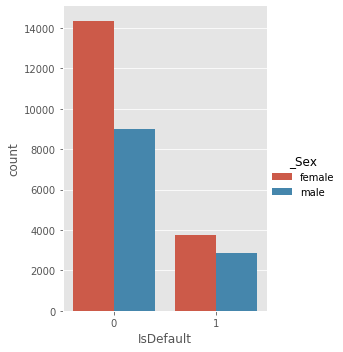

In [68]:
fg = sns.catplot('IsDefault', data=data, hue='_Sex',kind='count', aspect=0.75)
fg.set_xlabels('IsDefault')

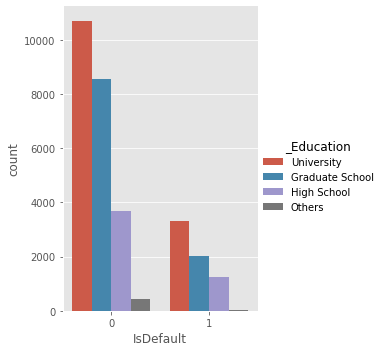

In [69]:
fg = sns.catplot('IsDefault', data=data, hue='_Education',kind='count', aspect=0.75)
fg.set_xlabels('IsDefault')

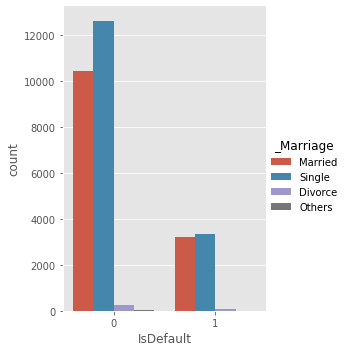

In [70]:
fg = sns.catplot('IsDefault', data=data, hue='_Marriage',kind='count', aspect=0.75)
fg.set_xlabels('IsDefault')

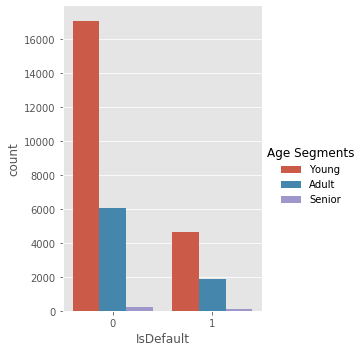

In [71]:
fg = sns.catplot('IsDefault', data=data, hue='Age Segments',kind='count', aspect=0.75)
fg.set_xlabels('IsDefault')

In [72]:
table = pd.crosstab(index=[data._Sex,data.IsDefault], columns=[data._Sex,data._Marriage])

In [73]:
table.unstack()

_Sex       female                                             male      \
_Marriage Divorce     Married       Others    Single       Divorce       
IsDefault       0   1       0     1      0  1      0     1       0   1   
_Sex                                                                     
female        148  44    6609  1860     37  3   7555  1856       0   0   
male            0   0       0     0      0  0      0     0      91  40   

_Sex                                            
_Marriage Married       Others    Single        
IsDefault       0     1      0  1      0     1  
_Sex                                            
female          0     0      0  0      0     0  
male         3844  1346     12  2   5068  1485

In [74]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table

_Sex              Female                          Male                      
_Marriage        Divorce Married Others Single Divorce Married Others Single
_Sex   IsDefault                                                            
female 0             148    6609     37   7555       0       0      0      0
       1              44    1860      3   1856       0       0      0      0
male   0               0       0      0      0      91    3844     12   5068
       1               0       0      0      0      40    1346      2   1485

In [19]:
data.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Distribution of Customers by Age')

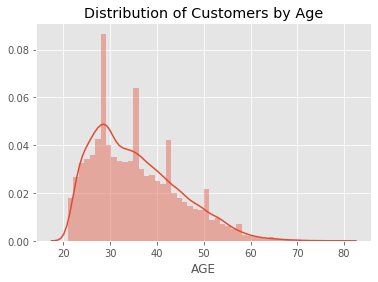

In [25]:
age_dist = sns.distplot(data.AGE)
age_dist.set_title("Distribution of Customers by Age")

In [22]:
data.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Text(0.5, 1.0, 'Distribution of Balance Limit')

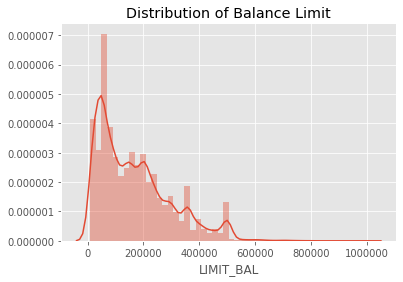

In [27]:
age_dist = sns.distplot(data.LIMIT_BAL)
age_dist.set_title("Distribution of Balance Limit")

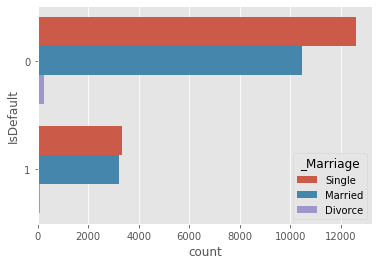

In [91]:
sns.countplot(y='IsDefault',hue='_Marriage',data=data,hue_order=['Single','Married','Divorce'])

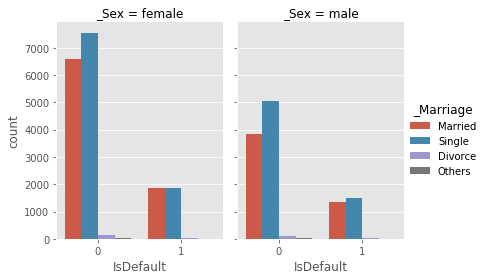

In [93]:
sns.catplot(x="IsDefault", hue="_Marriage", col="_Sex",
                data=data, kind="count",
                height=4, aspect=.7);

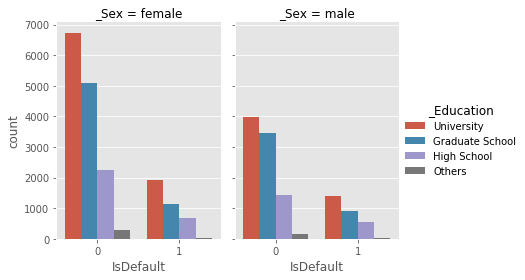

In [94]:
sns.catplot(x="IsDefault", hue="_Education", col="_Sex",
                data=data, kind="count",
                height=4, aspect=.7);

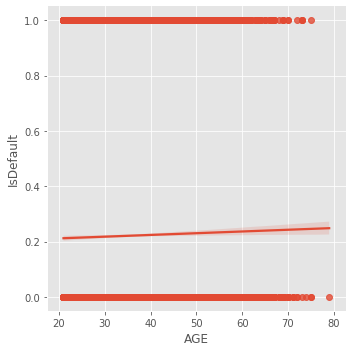

In [39]:
sns.lmplot('AGE', 'IsDefault', data=data)

El grafico nos indica que entre mayor edad mas chance de que el prestamo este en impago

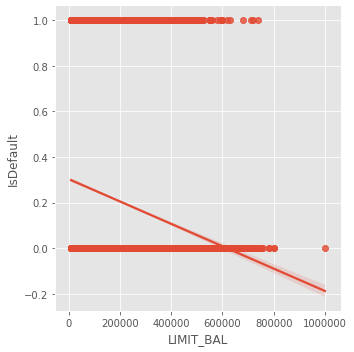

In [40]:
sns.lmplot('LIMIT_BAL', 'IsDefault', data=data)

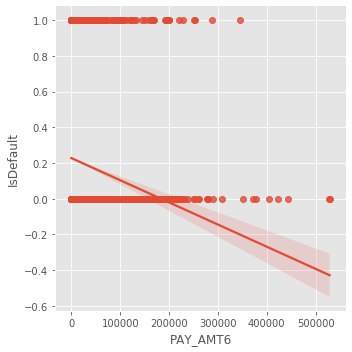

In [43]:
sns.lmplot('PAY_AMT6', 'IsDefault', data=data)

/home/jorge/anaconda3/envs/py3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


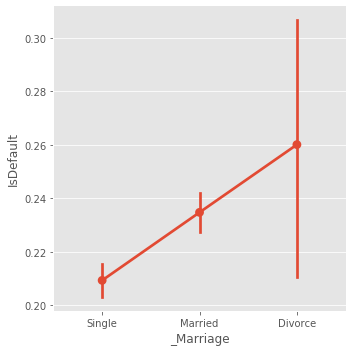

In [124]:
sns.factorplot('_Marriage', 'IsDefault', data=data, order=['Single','Married','Divorce'])

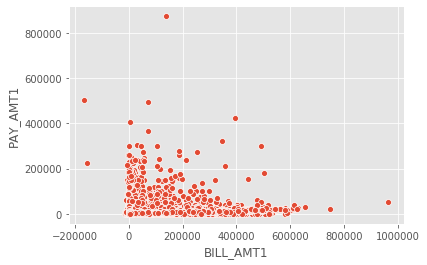

In [117]:
sns.scatterplot(x="BILL_AMT1", y="PAY_AMT1",sizes=(20, 200), palette="Set2",data=data)

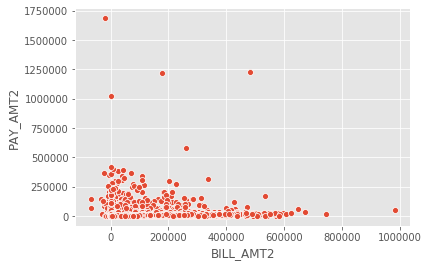

In [118]:
sns.scatterplot(x="BILL_AMT2", y="PAY_AMT2", sizes=(20, 200), palette="Set2",data=data)

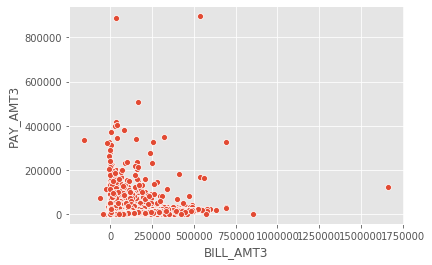

In [119]:
sns.scatterplot(x="BILL_AMT3", y="PAY_AMT3", data=data)

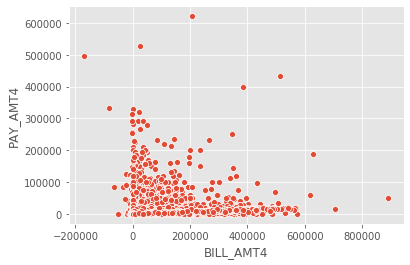

In [120]:
sns.scatterplot(x="BILL_AMT4", y="PAY_AMT4", data=data)

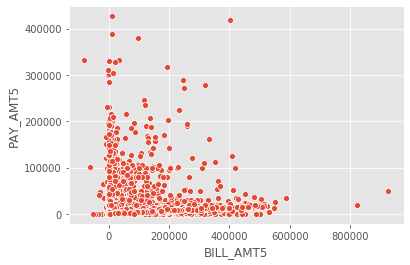

In [121]:
sns.scatterplot(x="BILL_AMT5", y="PAY_AMT5", data=data)

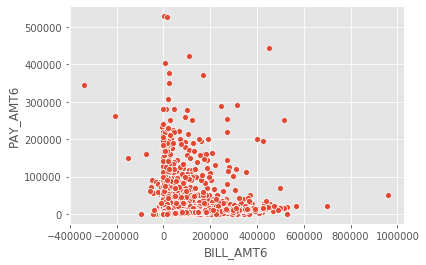

In [122]:
sns.scatterplot(x="BILL_AMT6", y="PAY_AMT6", data=data)

In [125]:
data.to_csv('CreditOneDefaultPayments.csv')